perps price ~ liquidations
spot price ~ liquidations
perps price ~ liquidations , reserves
spot price ~liquidations, reserves
repeat same with liquidations -> only binance liquidations, binance price
binance liquidations, binance price, + reserves
reserves -> exponential smoothing,  trend =d reserves.ewm / dt
liquidations ERC20 better?
vectorbt implementation to find optimal trialing stop
constant time position, small stop loss

In [ ]:
%run base.ipynb
from ct.fs import *
%matplotlib inline
from ct.alfafactory import *

# market data

In [2]:
dfbtc=qbars('BTCUSDT@binance',freq="5Min",table='ppttrades',date=[date(2021,5,1),date(2021,5,21)],addwhere=', vol>0.01')

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:05 xbar exchtm from ppttrades where  date within 2021.05.01 2021.05.21,  symbol=`BTCUSDT , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:05 xbar exchtm from ppttrades where  date within 2021.05.01 2021.05.21,  symbol=`BTCUSDT , vol>0.01


# alternative data

In [3]:
dfliq=qbars('BTCUSDT@binance',freq="5Min",table='pptliqs',date=[date(2021,5,1),date(2021,5,21)],addwhere=', side=`sell , vol>0.01')

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:05 xbar exchtm from pptliqs where  date within 2021.05.01 2021.05.21,  symbol=`BTCUSDT , side=`sell , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:05 xbar exchtm from pptliqs where  date within 2021.05.01 2021.05.21,  symbol=`BTCUSDT , side=`sell , vol>0.01


In [4]:
dfbtc1=dfbtc.loc['2021-05']
dfliq1=dfliq.loc['2021-05']

In [5]:
query="""system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:01 xbar exchtm from ppttrades where symbol=`BTCUSDT , exchtm>2021.07.13D16:35:00 """

runq2(folder='binance',query=query,rdb=False)

query=system "l /core/data/db/binance";
system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:01 xbar exchtm from ppttrades where symbol=`BTCUSDT , exchtm>2021.07.13D16:35:00 


,date,symbol,exchtm,o,h,l,c,v
exchtm,,,,,,,,
2021-07-13 16:35:00,2021-07-13,BTCUSDT,2021-07-13 16:35:00,32829.89,32834.63,32764.52,32773.39,347.935
2021-07-13 16:36:00,2021-07-13,BTCUSDT,2021-07-13 16:36:00,32773.4,32804.23,32773.4,32780.92,252.393
2021-07-13 16:37:00,2021-07-13,BTCUSDT,2021-07-13 16:37:00,32780.93,32780.93,32761.99,32766.18,191.501
2021-07-13 16:38:00,2021-07-13,BTCUSDT,2021-07-13 16:38:00,32766.18,32780.38,32760,32760,162.519
2021-07-13 16:39:00,2021-07-13,BTCUSDT,2021-07-13 16:39:00,32760.01,32760.51,32749.99,32753.64,232.276
2021-07-13 16:40:00,2021-07-13,BTCUSDT,2021-07-13 16:40:00,32753.63,32753.64,32740,32745.38,211.902
2021-07-13 16:41:00,2021-07-13,BTCUSDT,2021-07-13 16:41:00,32745.37,32773.19,32740.46,32759.9,209.736
2021-07-13 16:42:00,2021-07-13,BTCUSDT,2021-07-13 16:42:00,32759.9,32760.96,32729.62,32733.9,160.808
2021-07-13 16:43:00,2021-07-13,BTCUSDT,2021-07-13 16:43:00,32733.9,32738.47,32728.75,32729.16,120.602


In [77]:
dt.min.strftime(format='%Y.%m.%dD%H:%M:%S.%f')

'1.01.01D00:00:00.000000'

# backtrader strategy backtest

In [9]:
bt_trailpercent=0.005 #0.5%
liqlimit=1000
   
class Strategy(bt.Strategy):
    params = (('trailpercent', bt_trailpercent),)

    def notify_order(self, order):
        if not order.alive():
            self.order = None  # No pending orders

    def __init__(self):        
        pass

    def start(self):
        self.order = None  # Avoid operrations on pending order

    def next(self):
        if self.order:
            return  # pending order execution

        if not self.position:  # not in the market
            if self.data1.volume[0] >liqlimit :# and self.data1.reserve<10000000:
                self.order = self.buy(data=self.data0,exectype=bt.Order.Market)#,size=1)
                self.order = 'none'

        elif self.order is None: # Position in Market
            self.order = self.sell(data=self.data0,exectype=bt.Order.StopTrail,trailpercent=self.p.trailpercent,price=self.data0.open[0]) #If no price is specified, the latest close price is used
            

cerebro=initcerebro()
cerebro.addobserver(bt.observers.BuySell)
cerebro.addstrategy(Strategy)

data0=bt.feeds.PandasData(dataname=dfbtc1.rename(columns={'o':'open','h':'high','l':'low','c':'close','v':'volume'}),openinterest=None,timeframe=bt.TimeFrame.Minutes)
cerebro.adddata(data0)
# data1=bt.feeds.PandasData(dataname=dfliq1.rename(columns={'o':'open','h':'high','l':'low','c':'close','v':'volume'}),openinterest=None,timeframe=bt.TimeFrame.Minutes)
#data1=KDBFeed(sym='BTCUSDT@binance',freq="5Min",table='ppttrades',fromdate=date(2021,5,1),todate=date(2021,5,21),addwhere=', side=`sell , vol>0.01',timeframe=bt.TimeFrame.Minutes )
data1=KDBFeed(sym='BTCUSDT@binance',freq="5Min",table='ppttrades',fromdate=date(2021,5,1),todate=date(2021,5,21),addwhere=', side=`sell , vol>0.01',timeframe=bt.TimeFrame.Minutes )
cerebro.adddata(data1)

backtest = cerebro.run()
backtestres = backtest[0]
for k in backtest[0].analyzers.ta.get_analysis():
    print (k,dict(backtest[0].analyzers.ta.get_analysis()[k]))
print(dict(backtest[0].analyzers.sharpe.get_analysis()))

0

init 2021-05-01 2021-05-21


start 2021-05-01 2021-05-21
fetch 2021-05-01 2021-05-21
sym=BTCUSDT@binance,freq=5Min,table=ppttrades,date=[datetime.date(2021, 5, 1), datetime.date(2021, 5, 21)],addwhere=, side=`sell , vol>0.01 rdb=None
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:05 xbar exchtm from ppttrades where  date within 2021.05.01 2021.05.21,  symbol=`BTCUSDT , side=`sell , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:05 xbar exchtm from ppttrades where  date within 2021.05.01 2021.05.21,  symbol=`BTCUSDT , side=`sell , vol>0.01
sym=BTCUSDT@binance,freq=5Min,table=ppttrades,date=[datetime.date(2021, 5, 1), datetime.date(2021, 5, 21)],addwhere=, side=`sell , vol>0.01 rdb=None
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D00:05 xbar exchtm from ppttrades where  date within 2021

In [1]:
def btstrat(df0,df1,lags=20,nstdl=2,nstdh=2,methodma='ma',methodstd='ma',verbose=0,plot=False):        

    cerebro=initcerebro(multi=True,futures=True,fees=0.0006,margin=0.1,mult=10.)

#     data0=bt.feeds.PandasData(dataname=df0.rename(columns={'o':'open','h':'high','l':'low','c':'close','v':'volume'}),openinterest=None)#,timeframe=bt.TimeFrame.Hours)
#     cerebro.adddata(data0,name='BTCUSD_210326@binance')
#     data1=bt.feeds.PandasData(dataname=df1.rename(columns={'o':'open','h':'high','l':'low','c':'close','v':'volume'}),openinterest=None)#,timeframe=bt.TimeFrame.Hours)
#     cerebro.adddata(data1,name='BTCUSDT_210326@binance')

    data0=KDBFeed(sym='ETHUSD_210326@binance',freq='1H',ts='exchtm',table=None, date=[date(2021,2,10),date(2021,3,25)],addwhere=', vol>0.01')
    cerebro.adddata(data0,name='BTCUSD_210326@binance')
    
    data1=KDBFeed(sym='ETHUSDT_210326@binance',freq="1H",table='ppttrades',addwhere=', vol>0.01',date=[date(2021,2,10),date(2021,3,25)])
    cerebro.adddata(data1,name='BTCUSDT_210326@binance')

    cerebro.addstrategy(Strategy,lags=lags,nstdh=nstdh,nstdl=nstdl,methodma=methodma,methodstd=methodstd)
    cerebro.addsizer(Sizer10Percent)

    backtest = cerebro.run(runonce=False,tradehistory=True)
#     btres = backtest[0]
#     for k in ['total','pnl']:#backtest[0].analyzers.ta.get_analysis():
#         print (k,dict(backtest[0].analyzers.ta.get_analysis()[k]))
#     print(dict(backtest[0].analyzers.sharpe.get_analysis()))

#     printTradeAnalysis(cerebro, backtest[0].analyzers)
#     print("amount,price,sid,symbol,value")
#     DF(btres.analyzers.tradelist.get_analysis()).set_index('datein')
    
#     DF(btres.analyzers.tradelist.get_analysis()).set_index('datein').head(2)
#     rets=pd.DataFrame.from_dict(dict(btres.analyzers.timereturn.get_analysis()),orient='index', columns=['ret'])
    
    
    if plot:
        rcsave=plt.rcParams['figure.figsize']
        plt.rcParams['figure.figsize']=[30, 16]
        cerebro.plot(style='line', rowsmajor=1, rowsminor=1,volume=True, iplot=False, barup='green', bardown='grey',fmt_x_ticks = '%Y-%b-%d %H:%M',fmt_x_data = '%Y-%b-%d %H:%M')
        plt.rcParams['figure.figsize']=rcsave
        
        getinds(cerebro)[0].iplot()
    
    return {'cerebro':cerebro,'btres':btres,'rets':rets,'nt':btres.analyzers.ta.get_analysis()['total']['closed'],'SR':btres.analyzers.sharpe.get_analysis()['sharperatio']}#,'ind':bb}
btstrat(df0,df1,lags=100,nstdl=1,nstdh=1,plot=True)

NameError: name 'df0' is not defined

Backtesting Results
  Open Positions : -
  Closed Trades : -
  Inital Portfolio Value : $10000
  Final Portfolio Value : $10000.0
  Net P/L : -
  P/L Average per trade : -
  Drawdown : $0.0
  Sharpe Ratio: : None


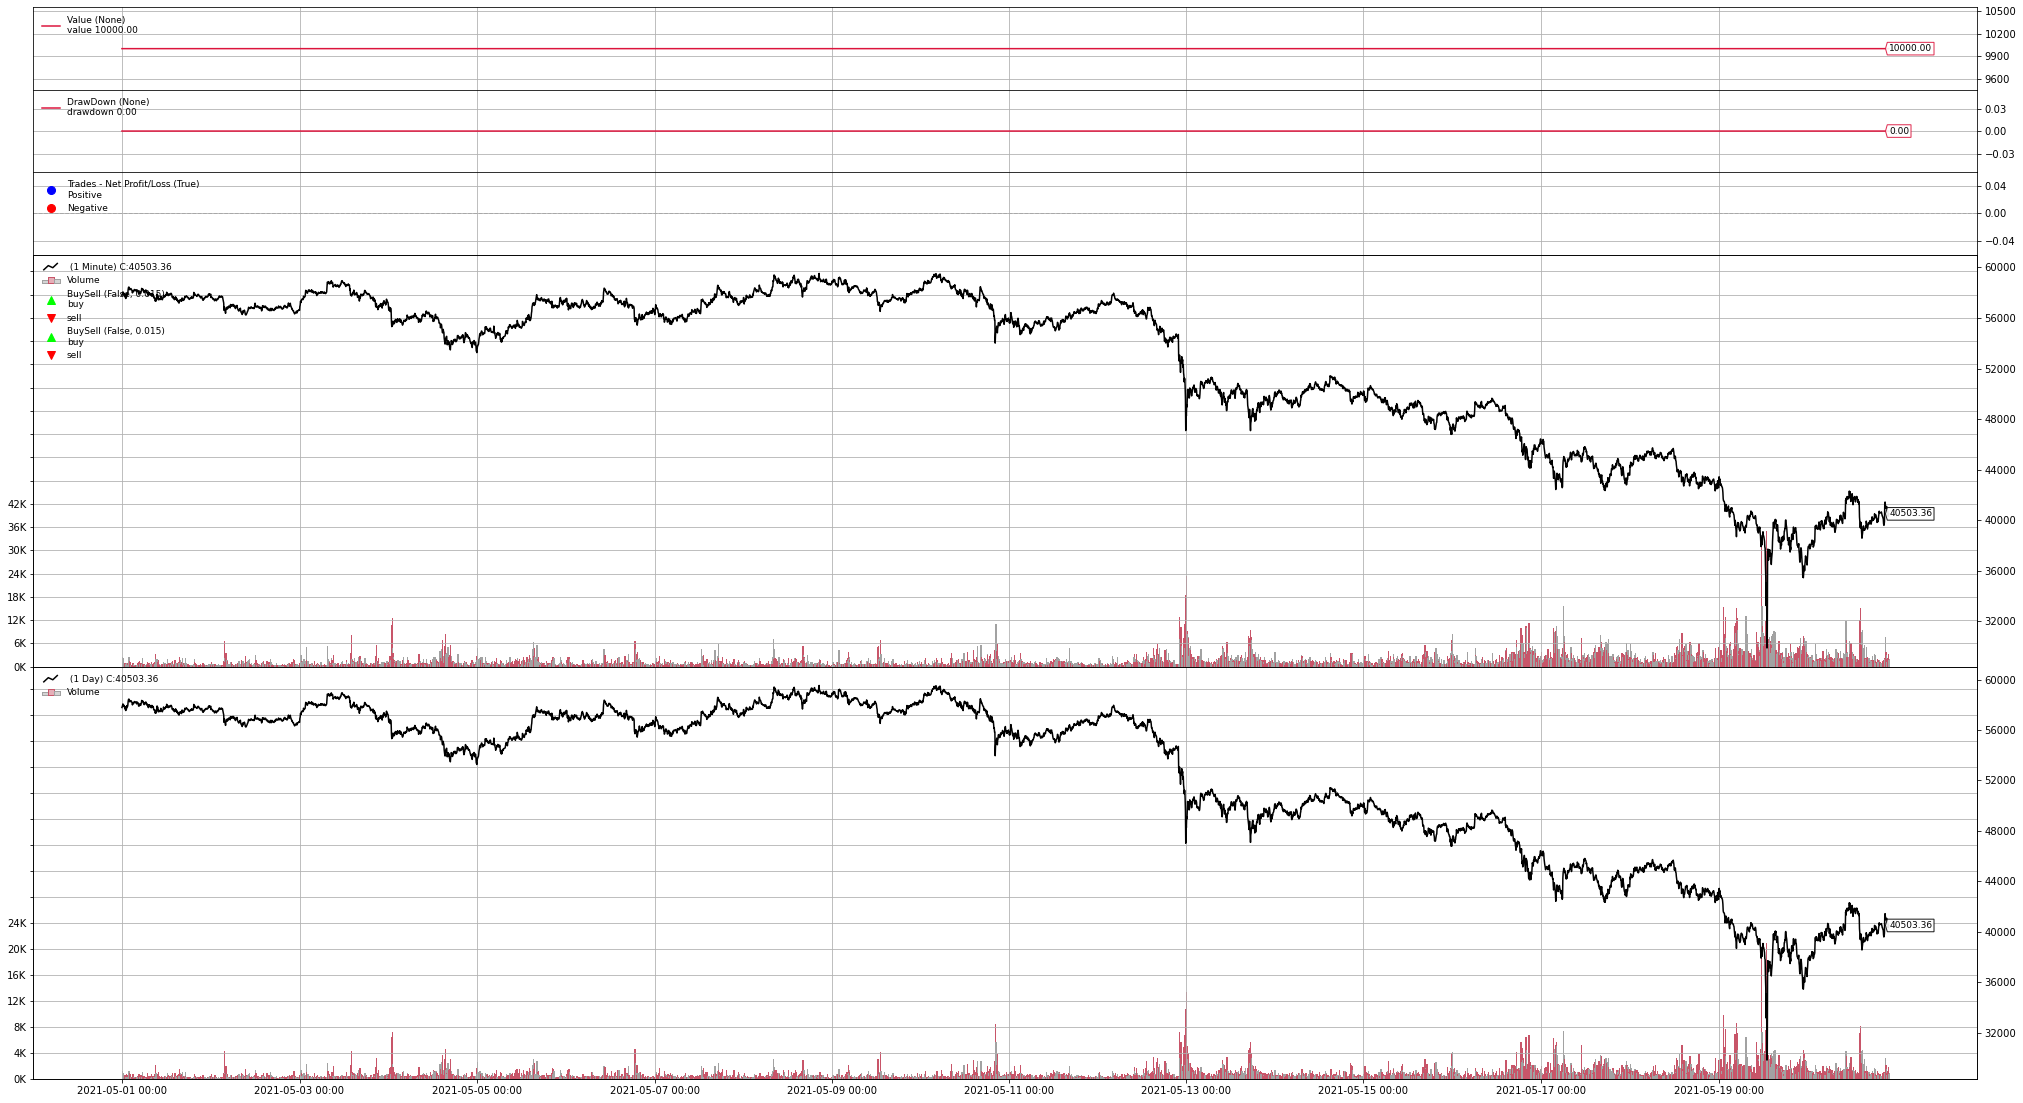

[[<Figure size 2160x1152 with 7 Axes>]]

In [8]:

printTradeAnalysis(cerebro, backtest[0].analyzers)
plt.rcParams['figure.figsize']=[30, 16]
cerebro.plot(style='line', volume=True, iplot=False, barup='green', bardown='grey') #candlestick
plt.rcParams['figure.figsize']=[12, 12]

# vectorbt replication using backtrader entries exits

In [ ]:

data = backtestres.analyzers.txn.get_analysis()
dfbacktest = pd.DataFrame.from_dict(data, orient='index', columns=['data'])
btt = pd.DataFrame(dfbacktest.data.values.tolist(), dfbacktest.index, columns=['amount', 'price', 'sid', 'symbol', 'value'])
btt.head()
bt_entries_mask = btt[btt.amount > 0]
bt_entries_mask.index = bt_entries_mask.index
bt_exits_mask = btt[btt.amount < 0]
bt_exits_mask.index = bt_exits_mask.index
bt_entries = pd.Series.vbt.signals.empty_like(dfbtc1['c'])
bt_entries.loc[bt_entries_mask.index] = True
bt_exits = pd.Series.vbt.signals.empty_like(dfbtc1['c'])
bt_exits.loc[bt_exits_mask.index] = True
btp = vbt.Portfolio.from_signals(dfbtc1['o'], bt_entries, bt_exits, price=dfbtc1['o'])#.vbt.fshift(1))
# display trades and cashflow
btp.get_trades().records_readable
btp.get_orders().records_readable
btp.share_flow().replace(0,np.nan).dropna()
btp.cash_flow().replace(0,np.nan).dropna()
btp.stats()
#viz
fig = vbt.make_subplots(specs=[[{"secondary_y": True}]])
fig = dfbtc1['c'].vbt.plot(trace_kwargs=dict(name='Price'), fig=fig)
fig = bt_entries.vbt.signals.plot_as_entry_markers(dfbtc1['c'], fig=fig)
fig = bt_exits.vbt.signals.plot_as_exit_markers(dfbtc1['c'], fig=fig)
fig.show_svg()

# vectorbt replication bt strategy  entries, exits calculated by vectorbt

In [ ]:

step = 0.01  # 1%
stops =npa([bt_trailpercent])
vbt_entries= pd.Series.vbt.signals.empty_like(dfbtc1['c'])
vbt_entries.loc[dfliq1[dfliq1['v'].shift(1)>liqlimit].index]=True
ts_exits = vbt.OHLCSTEX.run(vbt_entries,dfbtc1['o'], dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(stops),wait=1,stop_type=None, hit_price=None).exits
vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
vbtp = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
vbtp.stats()

In [ ]:
# visualizaitons
vbt_entries.astype(int).plot()
bt_entries.astype(int).plot()
fig = vbt.make_subplots(specs=[[{"secondary_y": True}]])
fig = dfbtc1['o'].vbt.plot(trace_kwargs=dict(name='Price'), fig=fig)
fig = vbt_entries.vbt.signals.plot_as_entry_markers(dfbtc1['o'], fig=fig)
fig = vbt_exits.vbt.signals.plot_as_exit_markers(dfbtc1['o'], fig=fig)
fig.show_svg()

vbtp.get_trades().records_readable
vbtp.get_orders().records_readable
vbtp.share_flow().replace(0,np.nan).dropna()
vbtp.cash_flow().replace(0,np.nan).dropna()

# vectorization 1d ts stops

In [ ]:
step = 0.001  # 1%
stops =list(np.arange(step, 0.20, step))#npa([bt_trailpercent])+
vbt_entries= pd.Series.vbt.signals.empty_like(dfbtc1['c'])

#strategy
vbt_entries.loc[dfliq1[dfliq1['v'].shift(1)>liqlimit].index]=True
ts_exits = vbt.OHLCSTEX.run(vbt_entries,dfbtc1['o'],dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(stops),wait=1,stop_type=None, hit_price=None).exits
#end strategy

vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
vbtp = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
vbtp.final_value().plot()
plt.show()
vbtp.sharpe_ratio().plot(title='sharpe')

# vectorization 2d limit

In [ ]:
step = 0.005  
stops =list(np.arange(step, 0.20, step))
liqstep=200.
liqlimits=np.arange(liqstep, 2000, liqstep)


vbt_entries= pd.Series.vbt.signals.empty_like(DF(index=dfbtc1['c'].index,columns=np.arange(len(liqlimits))))

#strategy
dfentr=DF(dfliq1[['v']].shift(1).values>liqlimits,index=dfliq1['v'].index)
vbt_entries.update(dfentr)
vbt_entries.fillna(False,inplace=True)



ts_exits = vbt.OHLCSTEX.run(vbt_entries,dfbtc1['o'],dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(stops), wait=1,stop_type=None, hit_price=None).exits
vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
vbtp = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
#end strategy

In [ ]:
vbtp.returns()

In [ ]:
#viz
#median, mean   strat  rolling sharpe
ax=DF(vbtp.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(alpha=0.7)
DF(vbtp.returns().resample('1D').sum().mean(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)

#total heatmaps
vbtp.final_value().subtract(10000).unstack().plot()
vbtp.final_value().subtract(10000).unstack().vbt.heatmap()#xaxis={"title": 'Traits',"tickangle": 45}
vbtp.sharpe_ratio().unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)
vbtp.final_value().subtract(10000).unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)

In [ ]:
#best params
#ighest sharpe of rolling sharpe ratios  
vbtp.returns().resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30).vbt.returns.sharpe_ratio().argmax()
#vbtp.returns().T.index[vbtp.returns().resample('1D').sum().vbt.returns.sharpe_ratio().argmax()]
#highest minimal rolling sharpe
vbtp.returns().resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30).min().argmax()

In [ ]:
#vbtp.returns().resample('1D').sum().median(axis=1)
vbtp.returns()[0.1][1].resample('1D').sum().vbt.returns().sharpe_ratio()
vbtp.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().sharpe_ratio()
vbtp.returns()[0.005][0].resample('1D').sum().vbt.returns().sharpe_ratio()

In [ ]:
#DF(vbtp.returns()[0.1][1].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).join(dfbtc['c']).plot2(1,'c')
DF(vbtp.returns()[0.1][1].resample('1D').sum().vbt.returns().daily()).join(dfbtc['c']).plot2(1,'c')
DF(vbtp.returns()[0.1][1].resample('1D').sum().vbt.returns().cumulative()).join(dfbtc['c']).plot2(1,'c')

In [ ]:
ax=DF(vbtp.returns()[0.1][1].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot()  
ax=DF(vbtp.returns()[0.005][0].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)
ax=DF(vbtp.returns()[0.085][2].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)
ax=DF(vbtp.returns()[0.13][2].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)
ax=DF(vbtp.returns()[0.065][0].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)

#ax=DF(vbtp.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)



## attemps at geenralization for n params,   not efficient  entries contstruction. 

import itertools

def f(s):
    print()
    print(s.head())
    raise 1
    
entries.apply(f,entries)

liqstep=200
liqlimits=np.arange(liqstep, 2000, liqstep)

step = 0.005  
ts_stops =list(np.arange(step, 0.20, step))

params={
    'liqlimit':liqlimits
    #'ts_stop':ts_stops
}

#list(itertools.product(*params.values()))
entries=pd.DataFrame(False,columns=pd.MultiIndex.from_tuples(  list(itertools.product(*params.values())) ,names=list(params.keys()) ),index=dfbtc1['c'].index)
#entries=pd.DataFrame(columns=pd.MultiIndex.from_tuples([len(params)*(np.nan,)],names=list(params.keys()),index=dfbtc1['c'].index)
#entries=pd.DataFrame(columns=pd.MultiIndex.from_tuples([len(params)*(np.nan,)],names=['p'+str(i) for i in range(nparams)]),index=dfbtc1['c'].index)
entries.head()
# entry strategy
dfentr=DF((dfliq1[['v']].shift(1).values>params['liqlimit']),index=dfliq1['v'].index)
dfentr.astype(float).sum().sum()
entries.update(dfentr,errors='raise')                                                                                                     

entries.sum().sum()
entries.astype(float).plot()
# exit strategy
exits=vbt.OHLCSTEX.run(entries,dfbtc1['o'],dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=ts_stops, wait=1,stop_type=None, hit_price=None).exits
exits.head()
entries,exits=pd.DataFrame.vbt.signals.clean(entries, exits)
entries.head()
# entry is on 'open'
portr=vbt.Portfolio.from_signals(dfbtc1['o'], entries, exits, price=dfbtc1['o']).returns()#.head()#.resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30).head()

portr.head()

# for i in range(len(params)):
#     portr.columns=portr.columns.droplevel()

#portr.head()
# param fix plots    
    
fixparams={'liqlimit':200,'ohlcstex_ts_stop':0.005}

#dff=portr.loc[:,(portr.columns.get_level_values('param1')==5)&(portr.columns.get_level_values('param0')==1)]#.head().columns.droplevel('param0')
#dff.columns=dff.columns.droplevel(['param0','param1'],axis='columns')
#portr.loc[:,(portr.columns.get_level_values('param1')==5)&(portr.columns.get_level_values('param0')==1)].droplevel(['param0','param1'],axis='columns')#.vbt.returns.daily().vbt.returns.sharpe_ratio().unstack().vbt.heatmap()

#def rolling_daily_sharpe_ratio_plot(df,fixedparams,window=30):
def dffixparams(df,fixparams):
    cond=True
    for k,v in fixparams.items():
        print(f"{k,v}")
        cond=(df.columns.get_level_values(k)==v)&cond
    print(f"cond={cond}")
    return df.loc[:,cond]#.droplevel(list(fixparams.keys()),axis='columns')

dffixparams(portr,fixparams).vbt.returns.daily().vbt.returns.rolling_sharpe_ratio(100).plot()#.unstack().vbt.heatmap()
    


raise 1

#strategy
dfentr=DF((dfliq1[['v']].shift(1).values>liqlimits1)&(dfliq1[['v']].shift(1).values<liqlimits2),index=dfliq1['v'].index)
vbt_entries.update(dfentr)                                                                                                     
vbt_entries.fillna(False,inplace=True)


ts_exits = vbt.OHLCSTEX.run(vbt_entries,dfbtc1['o'],dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(tsstops), wait=1,stop_type=None, hit_price=None).exits
vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
vbtp = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
#end strategy


#viz
#median, mean   strat  rolling sharpe
ax=DF(vbtp.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(alpha=0.7)
DF(vbtp.returns().resample('1D').sum().mean(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)

#heatmaps
vbtp.final_value().subtract(icap).unstack().plot()
vbtp.final_value().subtract(icap).unstack().vbt.heatmap()#xaxis={"title": 'Traits',"tickangle": 45}
vbtp.sharpe_ratio().unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)
vbtp.final_value().subtract(icap).unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)